# Project 1
## MTH 448
### Samuel Zamdmer

## Introduction
The MNIST dataset is set of 60,000 handwritten digits from 0 to 9. Without a computer, you would have to look at each of them and manually label all 60,000 of them. But the beauty of Python is that you can train an algorithm to look at one of the images and then have it automatically label it for you based on the neighbors around that image. By then splitting up the database into a set of training data and testing data, you can make sure it works with the training data and then use the perfected algorithm on testing data. In the end you can now pick any index out of the 60,000 images and the method will show you what number that index should be. \
\
More info at https://en.wikipedia.org/wiki/MNIST_database and
https://medium.com/towards-data-science/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

## Part 1. Creating the kNN Classifier Algorithm (k Nearest Neighbors)

In [37]:
from pathlib import Path 
import requests
import numpy as np 
import statistics as st
import gzip
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from tqdm import tqdm
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


## Part 1a.  Euclidean Distance
To begin looking how to calculate distances between training and testing points, we refer to a common formula called the $Euclidean \ distance \ formula$.  The Euclidean distance formula takes two points or vectors with $n$ coordinates and calculates the magnitude of the vector between the two points using a form of the Pythagorean Theorem.  The Euclidean distance formula follows as such where $v$ and $w$ are vectors:
$$d({\bf v},{\bf w}) = \sqrt{\sum_{i=1}^n (v_i -w_i)^2}$$

Using the formula above, we can the function, $dist$, which calculates the Euclidean distance between two parameters; the first parameter is an $m$ x $n$ array which represents the various coordinates of the labeled data and the second parameter is a one-dimensional array with $n$ rows representing a coordinate which is unlabeled.

In [2]:
def dist(X,w):
    new=X-w # subtraction operation to calculate distances between 'X' and 'w'
    squared=new**2 # square operation for each distance following Pythagorean theorem
    colsum=squared.sum(axis=1) # sum all the values along the columns
    return np.sqrt(colsum) # return the square root for each vector in 'X' to get distances for each

Test this function with the two given arrays $X$ and $w$ which should return the array, $array ( \ [ \ 2.82842712, \ 10.19803903, \ 18.11077028 \ ] \ )$ from class.

In [3]:
X = np.arange(12).reshape(3, 4) # given 3x4 array
w = np.array([0, 1, 0, 1]) # given 1x4 array
dist(X,w)

array([ 2.82842712, 10.19803903, 18.11077028])

## Part 1b. Calculating kNN
The second step to break down the $knn\_classifier$ algorithm is to determine from as many vectors in array $X$, which vectors are the closest points to our test point, $p$.  Therefore, we must include another parameter for our next function called $k$ which are the number of closest neighbors to point,s $p$.  $p$ will have the same $n$ coordinates as a single vector in $X$, so we can use our $dist$ function to calculate the distances from all the points in $X$.  From there we return only $k$ coordinates with the shortest distances to $p$.  To preserve order for our indices, we use $argsort$ function from Python.

In [4]:
def find_kNN(X,p,k): #returns array of k closest neighbors to point p
    distance = dist(X,p)
    return argsort(distance)[:k] # return 'k' shortest distances

Below is a function from class called $plot\_clusters$, which takes certain arguments $X$, containing all the training points, $y$ the labels for the training points, $p$, the point which we want to classify, $p\_label$, the predicted label for $p$, and finally $neighbors$, which are a list of row indices which are the closest to point $p$. The function then will plot all the arguments accordingly.

In [5]:
%config InlineBackend.figure_format = 'retina'

# function from class
def plot_clusters(X, y, p=None, p_label=None, neighbors=None):
    col_list = ['dodgerblue', 'limegreen', 'red', 'orange', 'fuchsia']
    colors = ListedColormap(col_list)
    norm = Normalize(0, len(col_list))

    # plot dots with correct colors according to labels
    plt.figure(figsize=(8, 8))
    with plt.style.context('seaborn'):
        scatter = plt.scatter(X[:, 0],
                              X[:, 1],
                              c=y,
                              s=90,
                              cmap=colors,
                              norm=norm,
                              label=y)
        
        # plot a star at a given point
        if p is not None: 
            p_col = "k" if p_label is None else colors(norm(p_label))
            plt.plot(p[0], p[1], marker="*", mfc=p_col, mec="k", ms=30, mew=2)
        # plot circles around points
        if neighbors is not None:
            plt.scatter(X[neighbors, 0], # x coors
                        X[neighbors, 1], # y coors
                        edgecolors='black',
                        linewidth=3,
                        facecolors="None", 
                        s=300)# size of the circles
        plt.legend(*scatter.legend_elements(),
                   markerscale=1.5,
                   prop={
                       "size": 12,
                       "weight": "normal"
                   })
    plt.show()

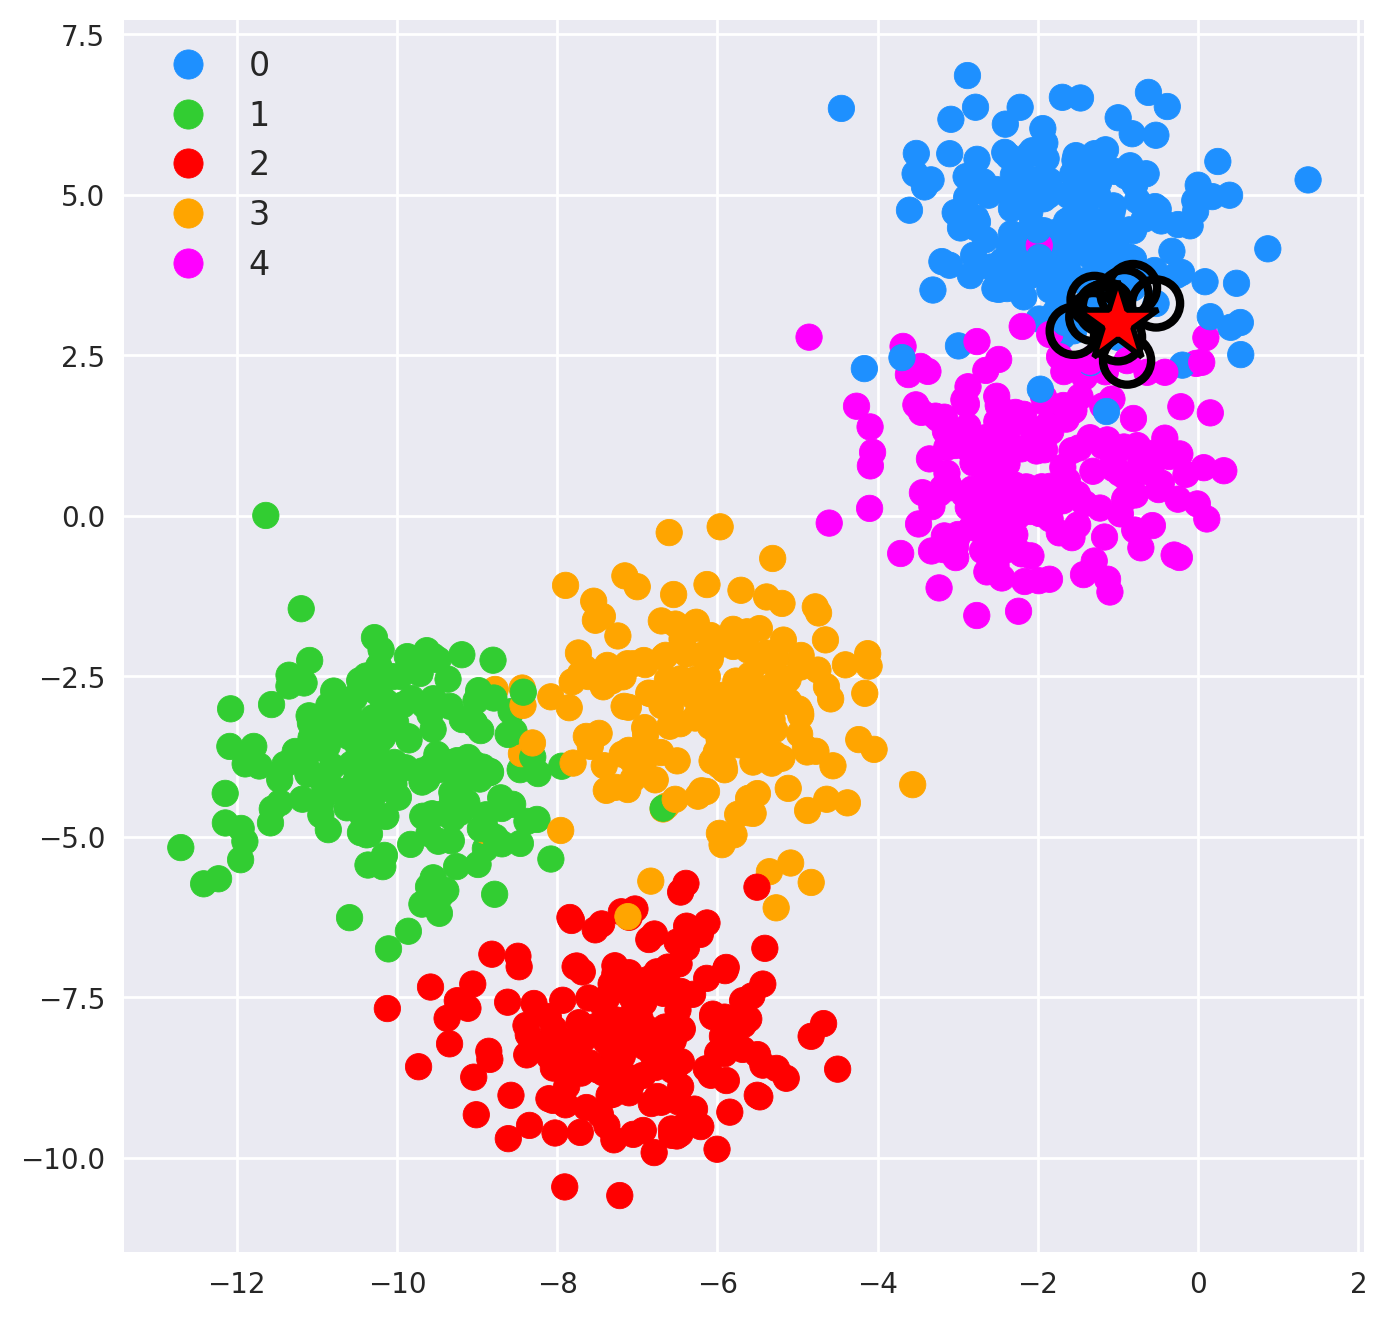

[168 925 624 637 110 101 970 391 754 444]


In [6]:
# also from class, function make_blobs useful to generate random sets of people to test function
X, y = make_blobs(    
# 'X' is an array of coordinates for the points generated by 'make_blobs'
# 'y' is an array of labels for the points based on their points cluster centers
    
    n_samples = 1000, # generate 1000 randomized points
    n_features = 2, 
    centers = 5, # generate 5 cluster centers from 'n_samples'
    cluster_std = 1, 
    random_state = 1 # can change to depending on which version of randomization
)

X, y

p=[-1,3] # define point 'p'

ten_NN=find_kNN(X,p,10)

plot_clusters(X, y, p=p, p_label=2, neighbors=ten_NN) # plot info with 'p' star and circle 10 neighbor pts
print(ten_NN) # print 'ten_NN' which displays indices for 10 nearest training points

Function running as expected because the function circled the 10 nearest points to the test point which is starred. The list printed out is a list of the points circled.

## Part 1c. Combining with kNN_classifier
Assembling the $knn\_classifier$. Returns a touple that is the predicted label and the indecies of the neighbors that defined that label.

In [7]:
def knn_classifier(training_data,training_labels,x,n):
    neighbors = find_kNN(training_data,x,n)
    labels = training_labels[neighbors] # slice 'training_labels' from 'n' nearest neighbors
    predict = st.mode(labels) # determine most common label
    return predict,neighbors

Test the $knn\_classifier$ with the $make\_blobs$ funcion

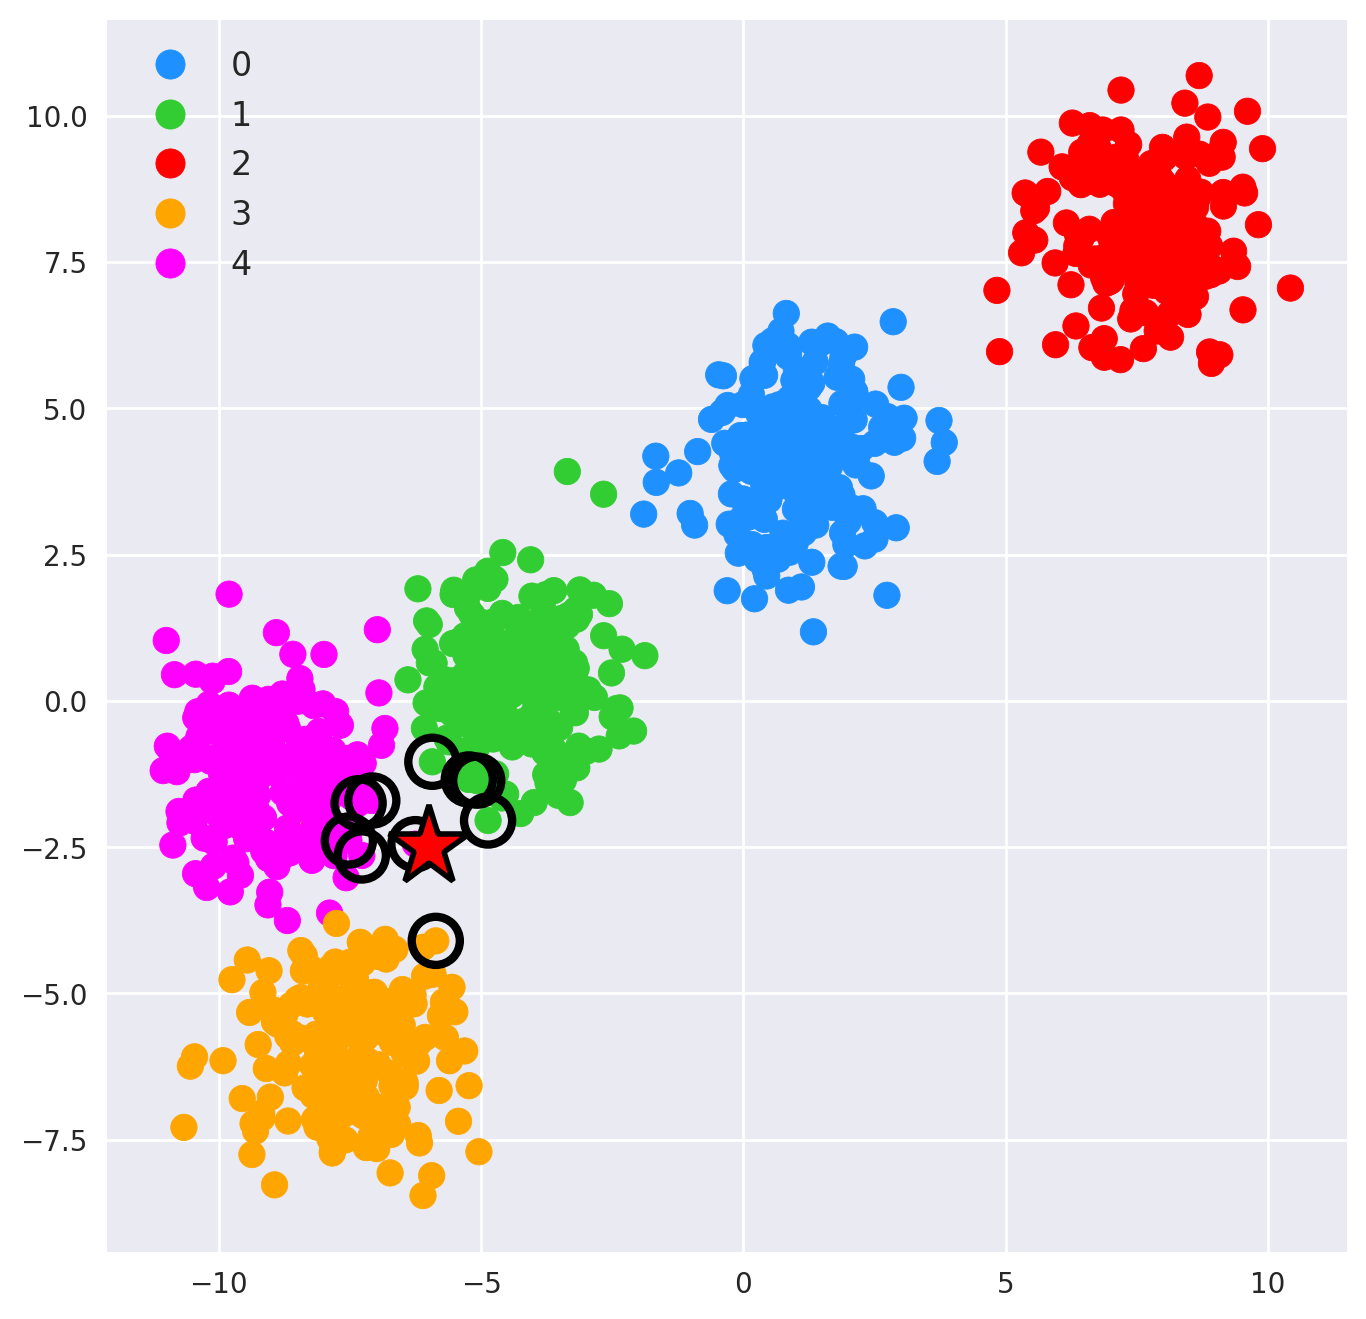

(4, array([316, 641, 227, 189, 202,  78, 450, 657,  14, 244], dtype=int64))


In [10]:
X, y = make_blobs(    
# 'X' is an array of coordinates for the points generated by 'make_blobs'
# 'y' is an array of labels for the points based on their points cluster centers
    
    n_samples = 1000, # generate 1000 randomized points
    n_features = 2, 
    centers = 5, # generate 5 cluster centers from 'n_samples'
    cluster_std = 1, 
    random_state = 3 # can change to depending on which version of randomization
)

X, y

p=[-6,-2.5] # test point 'p'

ten_NN=find_kNN(X,p,10)

plot_clusters(X, y, p=p, p_label=2, neighbors=ten_NN) # plot info with 'p' star and circle 10 neighbor pts
print(knn_classifier(X,y,p,10))

## Part 2. MNIST Database
To test this classifier out for a purpose, we will use the MNIST data set of 60,000 handwritten miages and their labels from the website. To do this we will need to do a HTTP request to the site with the $request$ module. Then, after openeing and reading the information, we will reshape and store the information into $images$ and $labels$. 

In [32]:
def get_MNIST(): # makes the training data and labels global variables
    mnist_url = "http://yann.lecun.com/exdb/mnist/" # URL for MNIST images and labels
    img_file = "train-images-idx3-ubyte.gz" # URL for images specicly
    labels_file = "train-labels-idx1-ubyte.gz" # URL for labels specificly

    for fname in [img_file, labels_file]:
        if Path(fname).is_file() :
            print(f"Found: {fname}")
            continue
        print(f"Downloading: {fname}") # check if files arent found then continue
        r = requests.get(mnist_url + fname) # send HTTP request
        with open(fname, 'wb') as foo:
            foo.write(r.content)
            
    with gzip.open(img_file, 'rb') as foo:
        f = foo.read()
    
    with gzip.open("train-labels-idx1-ubyte.gz", 'rb') as foo:
        g = foo.read()
        
    global images
    global labels
    
    images = np.array([b for b in f[16:]]).reshape(-1,28*28) # slide and shape img file to array of data points
    labels = np.array([b for b in g[8:]]) # slide label file in an array

    return images,labels

In [33]:
images,labels = get_MNIST()#[0] # store images
#labels = get_MNIST()[1] # store labels
len(images),len(labels) # check size of arrays to 60,0000 

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


(60000, 60000)

## Part 3a. Determining Training vs. Testing Data
To test the performance of our classifier, we want to break up the data in to labeled training data and unlabeled testing data. With this we can see the accuracy of the algorithm on how it performed with the testing data. 

To begin, we will make the first 80% of the data training and the rest be testing data

In [34]:
n = int(.8 * 60000)
training_images = images[:n] # first n images for training
training_labels = labels[:n] # first n labels for training
testing_images = images[n:] # first n images for testing
testing_labels = labels[n:] # first n labels for testing

training_images,training_labels,testing_images,testing_labels

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([5, 0, 4, ..., 0, 1, 2]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([4, 7, 8, ..., 5, 6, 8]))

## Part 3b. Testing Performance of kNN classifier with MNIST Data
Apply the training and testing data to the algorithm. Then with the most common label from the nearest 10, we will have our prediction.

In [38]:
knn_results = np.zeros((len(testing_images),2),dtype=int) # array of zeros to be altered for labels

for i in tqdm(range(len(testing_images))): # loop through indices of 'testing_images'
    predict=knn_classifier(training_images,training_labels,testing_images[i],10) #store 'knn_classifier' results
    predictlabel= predict[0] # store predicted label
    knn_results[i,:]=[predictlabel,testing_labels[i]] # assign corresponding 'i' row and all the columns in 'knn_results' as a vector with 'predictlabel' and actual label in 'testing_labels'
            
print(knn_results[:10]) # first 10 results

100%|██████████| 12000/12000 [37:20<00:00,  5.36it/s] 

[[4 4]
 [7 7]
 [8 8]
 [8 8]
 [5 5]
 [6 6]
 [6 6]
 [8 8]
 [2 2]
 [2 2]]


With the first 10 results, we can see that the classifier ran succesfully. Every image is correctly associated with what it was classified with. To visualize all 12,000 images from the testing data, we can make a heatmap to see how many images were falsely labeled. In this 10x10 matrix, the center diagonal should all be high nimbers while any incorrect labels will be seen elsewhere. 

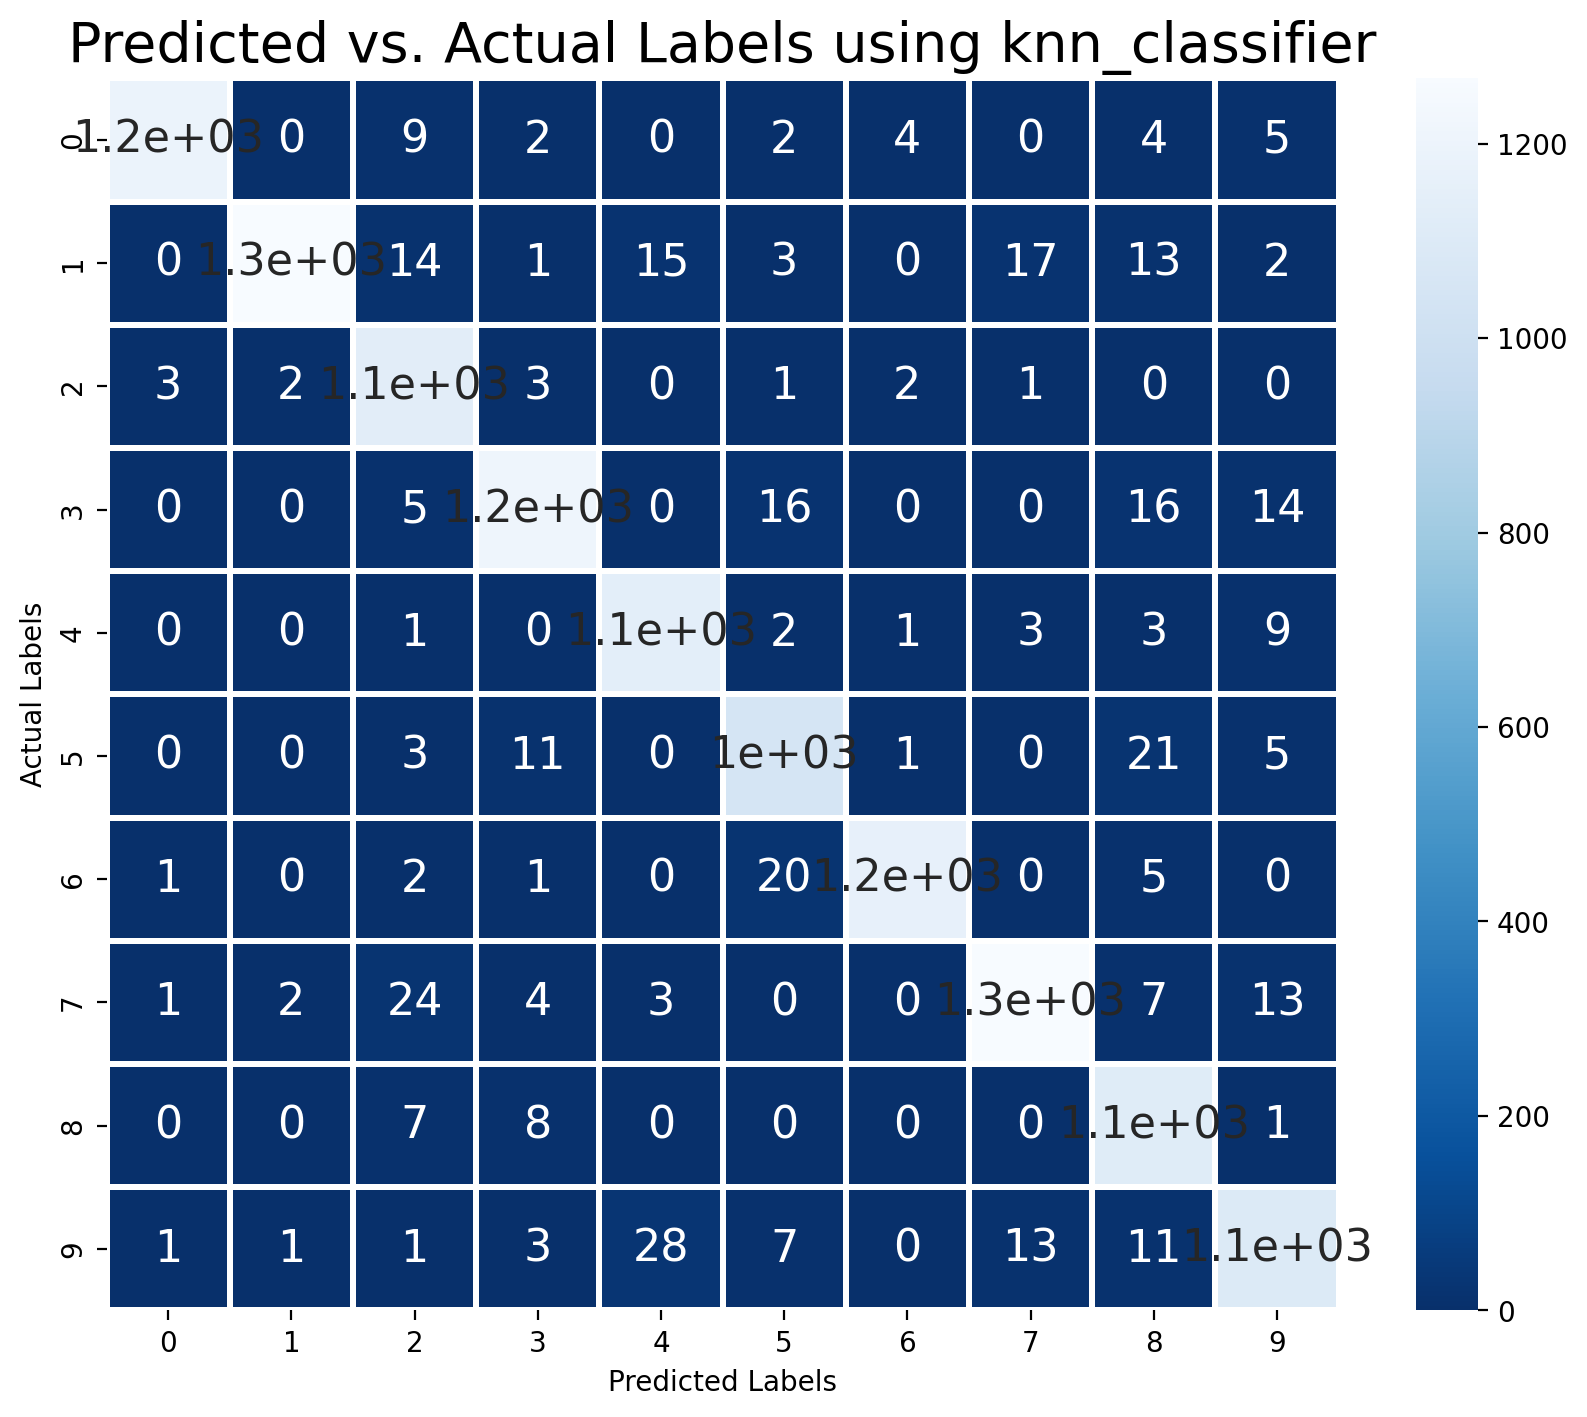

In [39]:
confusionmatrix= np.zeros((10,10),dtype=int) # matrix to be altered
predicted_labels=knn_results[:,0]

for t in range(len(predicted_labels)):
    confusionmatrix[predicted_labels[t],testing_labels[t]] += 1 # add one to corresponding location in matrix

plt.figure(figsize=(10, 8))

sns.heatmap(confusionmatrix, # heatmap plot
            annot=True,
            annot_kws = {"fontsize": 16}, 
            cbar=True,
            linewidth=2,
            square=True, 
            cmap="Blues_r"
            
)
plt.title('Predicted vs. Actual Labels using knn_classifier', fontsize=20)
plt.xlabel("Predicted Labels") # x-axis
plt.ylabel("Actual Labels") # y-axis
plt.show();

Here you can begin to see some pattern among the imaged that are incoreectly labeled. A majority were correct but a 9 was mislabeled as a 4 28 times. Other common ones are 7's being lebeled as 2's and 6's labeled as 5's.

Then using booleans, you can find the errors and visualize why the classifier made a mistake. I will show 6 examples.

In [40]:
(predicted_labels != testing_labels).sum() # sum of all the errors

378

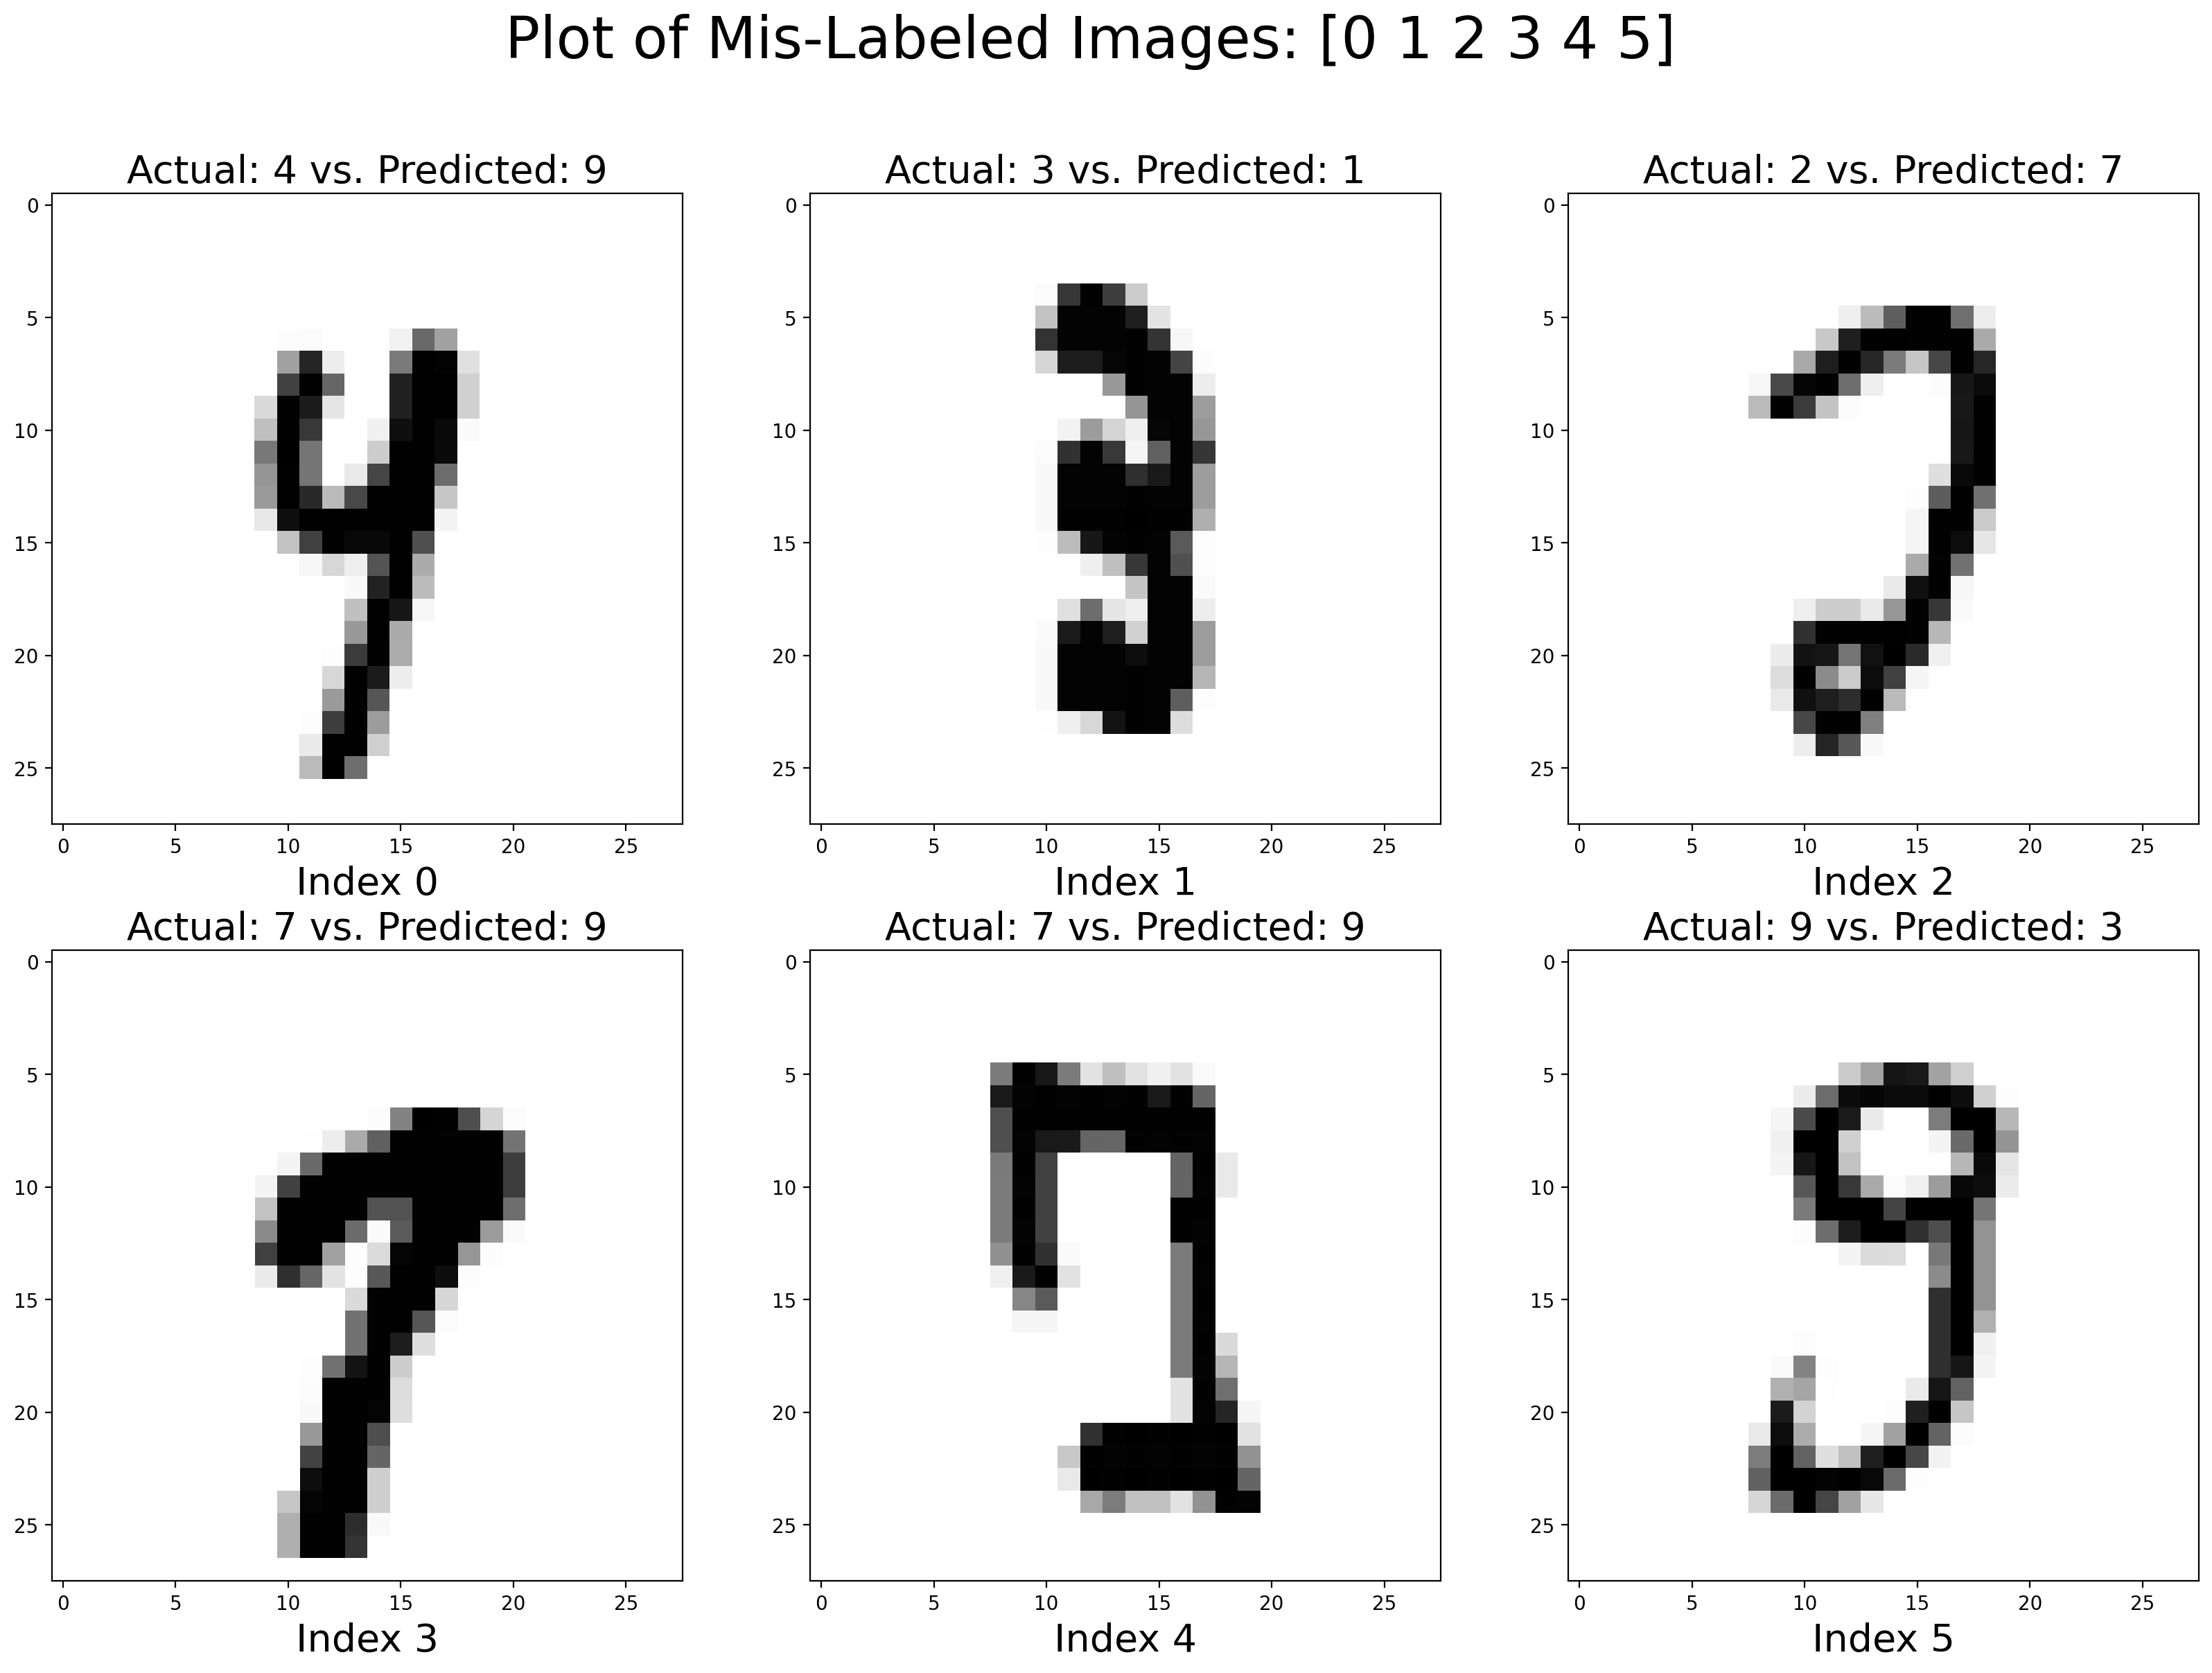

In [42]:
def visualize_6_digits(indices): # input is an array of 6 indices ranging from 0-377
    images= testing_images[((predicted_labels != testing_labels) == True)] 
    a_label=testing_labels[((predicted_labels != testing_labels) == True)]
    p_label= predicted_labels[((predicted_labels != testing_labels) == True)]
    
    plt.figure(figsize=(20,13))
    p=0 
    
    for i in indices:
        p+=1
        plt.subplot(2,3,p)
        plt.title('Actual: ' + str(a_label[i]) + ' vs. ' + 'Predicted: ' + str(p_label[i]),fontsize=20)    
        plt.xlabel('Index ' + str(i), fontsize=20)
        plt.imshow(images[i].reshape(28,28),cmap='Greys')
    plt.suptitle('Plot of Mis-Labeled Images: ' + str(indices), fontsize=30);
    return
visualize_6_digits(np.arange(0,6))

Visually, you can see why the classifier made the mastakes that it did. These are poorly drawn images so the innacuracy is justified. I will calculate the accuracy below.

In [43]:
accuracy_1 = (predicted_labels == testing_labels).sum()/ len(testing_labels)
accuracy_1

0.9685

The kNN Classifier that we built has an accuracy of 96.85%. This is a very good performance but the main downside is how long the classifier took to run. In each of the 12,000 iterations, it calcualtes the distances and selects the 10 closests everytime.

Fortunately, sci-kit learn library has one built in so next we will see how that performs when given the same data. 

In [45]:
from sklearn.neighbors import KNeighborsClassifier # import classifier

In [50]:
knn = KNeighborsClassifier(n_neighbors= 10) 
knn.fit(training_images, training_labels)
knn_predict = knn.predict(testing_images)
knn_predict

c:\Users\Samuel Zamdmer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([4, 7, 8, ..., 5, 6, 8])

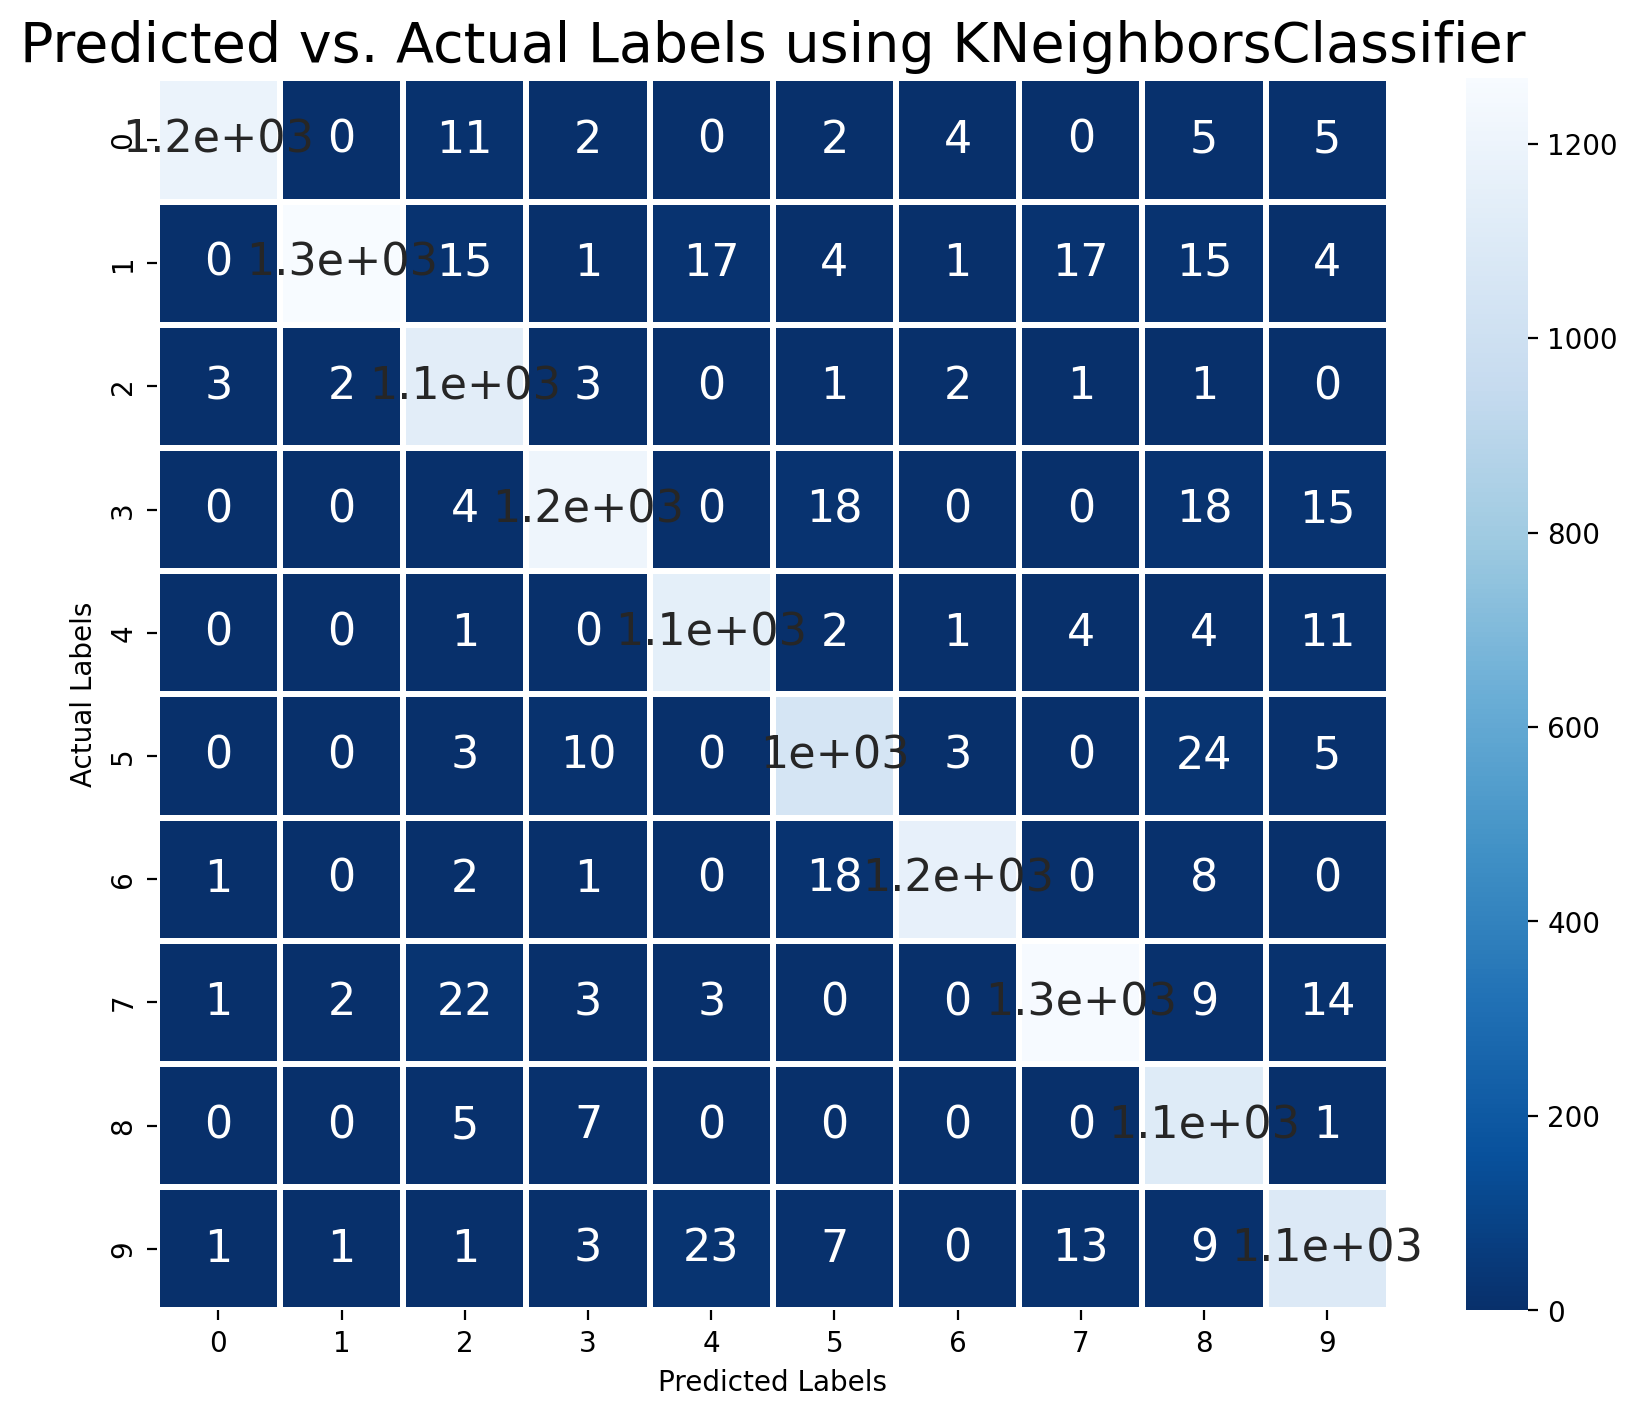

In [55]:
confusionmatrix_2 = np.zeros((10,10),dtype=int) # matrix to be altered
predicted_labels = knn_results[:,0]

for p in zip(knn_predict,testing_labels):
    confusionmatrix_2[p[0], p[1]] += 1 # add one to corresponding location in matrix

plt.figure(figsize=(10, 8))

sns.heatmap(confusionmatrix_2, # heatmap plot
            annot=True,
            annot_kws = {"fontsize": 16}, 
            linewidth=2,
            square=True, 
            cmap="Blues_r"
            
)
plt.title('Predicted vs. Actual Labels using KNeighborsClassifier', fontsize=20)
plt.xlabel("Predicted Labels") # x-axis
plt.ylabel("Actual Labels") # y-axis
plt.show();

This time, we got to this point much faster but lets see how the accuracy compares.

In [56]:
(knn_predict != testing_labels).sum()

394

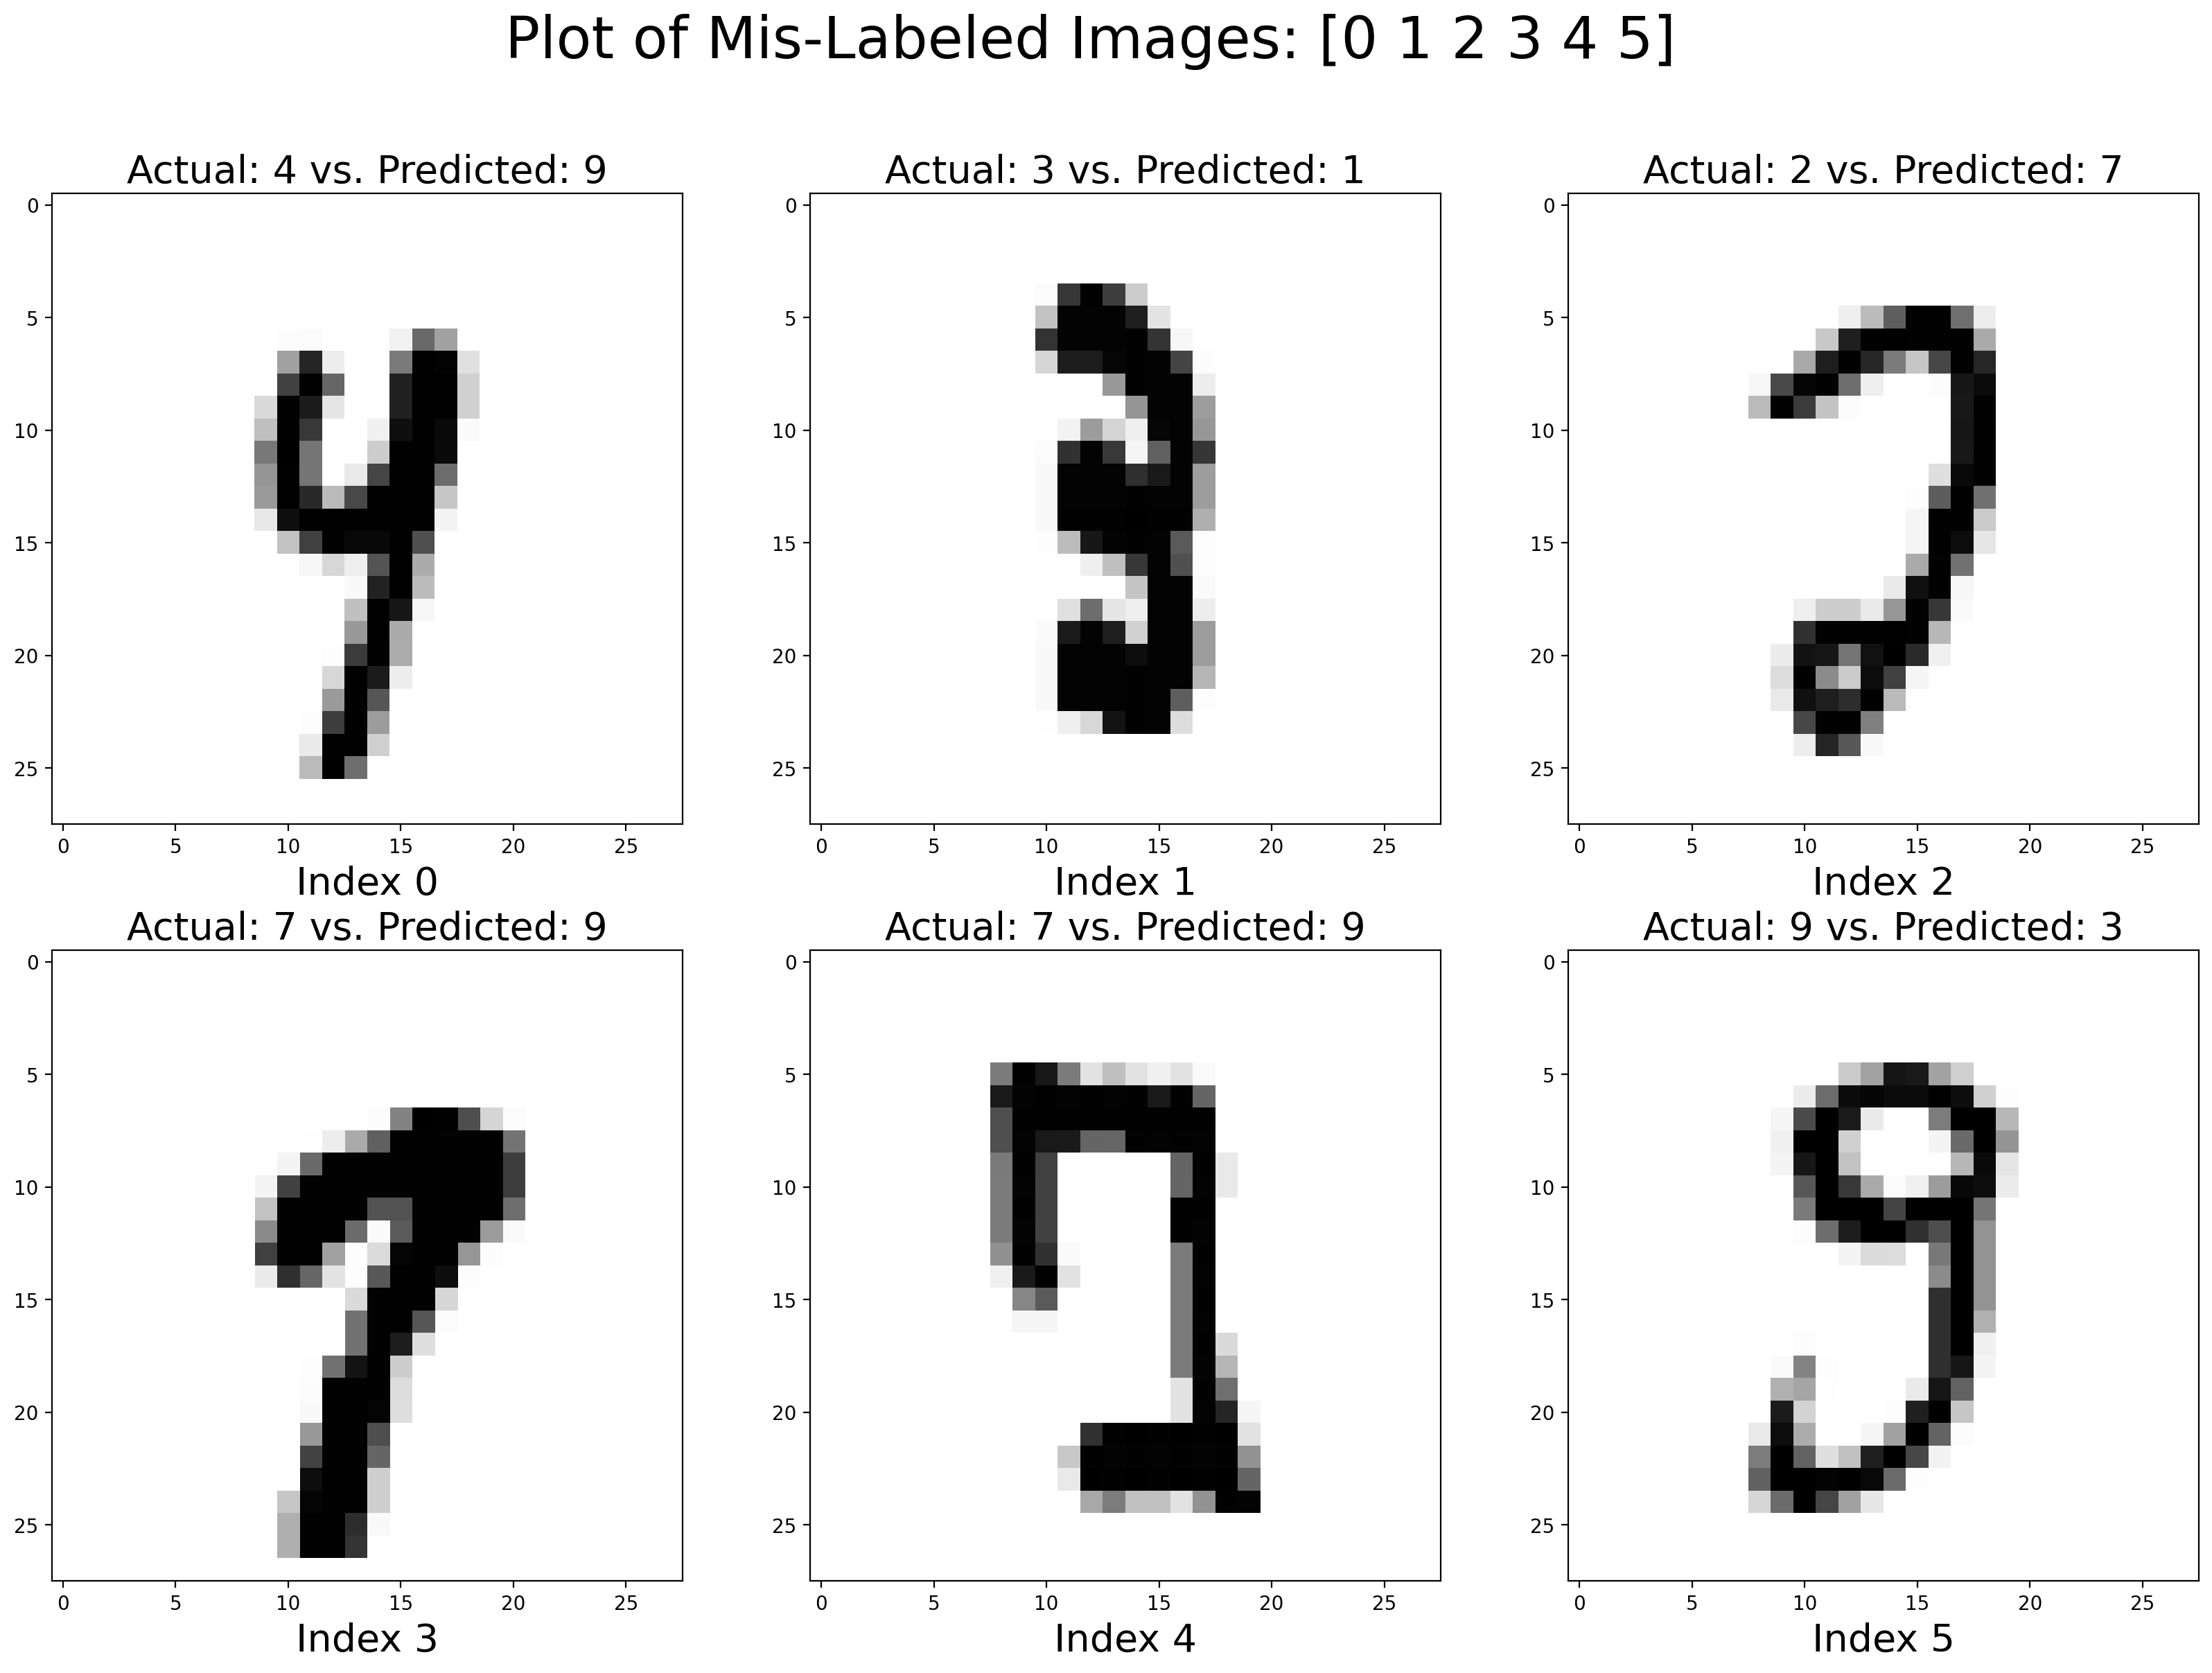

In [57]:
def visualize_6_digits(indices): # input is an array of 6 indices ranging from 0-377
    images= testing_images[((knn_predict != testing_labels) == True)] 
    a_label=testing_labels[((knn_predict != testing_labels) == True)]
    p_label= knn_predict[((knn_predict != testing_labels) == True)]
    
    plt.figure(figsize=(20,13))
    p=0 
    
    for i in indices:
        p+=1
        plt.subplot(2,3,p)
        plt.title('Actual: ' + str(a_label[i]) + ' vs. ' + 'Predicted: ' + str(p_label[i]),fontsize=20)    
        plt.xlabel('Index ' + str(i), fontsize=20)
        plt.imshow(images[i].reshape(28,28),cmap='Greys')
    plt.suptitle('Plot of Mis-Labeled Images: ' + str(indices), fontsize=30);
    return
visualize_6_digits(np.arange(0,6))

In [58]:
accuracy_2 = ((knn_predict == testing_labels).sum()/len(testing_labels))
accuracy_2

0.9671666666666666

KNeighborsClassifier had a accuracy of 96.72% for 10 neighbors. This is 0.13 lower than the accuracy for the one that wee built. Its almost the same accuracy but you dont have to wait 30 minutes to train the data.

## Conclusion
The $k$-Nearest Neighbor algorithm is a smart way to combine math and coding techniques to classify information effectively. Comparing our two versions, $knn\_classifier$ and $knn$, both performed extremely well with high accuracy on the MNIST database. The main difference was runtime—our custom code took significantly longer than simply inputting all test points into one line of code for $knn$. While this isn’t surprising, it’s something we could work on improving for better efficiency.

When we plotted the mislabeled images, it became clear that handwriting differences were a big factor in misclassifications. Over time, people tend to write digits less consistently from fatigue, which can affect how test points align with training data. If a test point resembles clusters from multiple areas, it’s more likely to be mislabeled. A potential next step could be experimenting with the number of neighbors used in the algorithm to see if it impacts accuracy for both our classifier and the $sci-kit \ learn$ version.

Another interesting idea would be to explore ways to make the handwritten images clearer, whether they’re training or testing points. Better image clarity could improve distance calculations and make clusters easier to identify, reducing misclassifications. It would also be interesting to tweak our function to handle subtle handwriting nuances more effectively, helping the algorithm interpret and analyze images with greater precision. Since $k$-Nearest Neighbor is already very accurate, the main goal would be to identify and address those small errors to boost overall performance even further.

# References
* Yalçın, O. G. (2023, January 7). Image classification in 10 minutes with Mnist Dataset. Medium. Retrieved February 26, 2023, from https://medium.com/towards-data-science/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d 
* Wikimedia Foundation. (2023, January 29). MNIST database. Wikipedia. Retrieved February 26, 2023, from https://en.wikipedia.org/wiki/MNIST_database 
* “sklearn.neighbors.KNeighborsClassifier” Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 
* “K-Nearest Neighbors Algorithm.” Wikipedia, Wikimedia Foundation, 2 Feb. 2023, https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm. 
* “MNIST Database.” Wikipedia, Wikimedia Foundation, 29 Jan. 2023, https://en.wikipedia.org/wiki/MNIST_database. 
* “Seaborn.heatmap.” Seaborn.heatmap - Seaborn 0.12.2 Documentation, https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap. 